<a href="https://colab.research.google.com/github/wheemin-2/25-1-ESAA/blob/main/0331_HW_TextAnaylsis_Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **토픽 모델링(Topic Modeling) - 20 뉴스그룹**

Topic Modeling

- 문서 집합에 숨어 있는 주제를 찾아내는 것
- 머신러닝 기반의 토팍 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함

토픽 모델링 기법 (ML based)
- LSA (Latent Semantic Analysis)
- LDA (Latent Dirichlet Allocation)
    - 차원 축소의 LDA와 다른 알고리즘이므로 주의!

사이킷런은 LDA 기반의 토픽 모델링을 `LatentDirichletAllocation` 클래스로 제공

(실습 내용) 20 뉴스그룹 데이터세트에서 모터사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용

*참고 : 20 뉴스그룹은 20가지의 주제를 가진 뉴스그룹의 데이터를 가짐



```
# 20가지 주제 목록
['alt.atheism',   'comp.graphics',  ’comp.os.ms-windows.misc',  'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',   'comp.windows.x‘,
'misc.forsale',  'rec.autos',  'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey'sci.crypt', 'sci.electronics', 'sci.med',  
'sci.space', 'soc.religion.Christian',  'talk.politics.guns', 'talk.politics.mideast',  'talk.politics.misc','talk.religion.misc']
```

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x',
        'talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
                             stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


feat_vect
- CountVectorizer 객체 변수
- 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터

In [ ]:
# 피처 벡터화된 데이터 세트 기반으로 LDA 토픽 모델링 수행
# 토픽의 개수는 뉴스그룹에서 추출한 주제와 동일하게 8개로 설정
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

`components_` 속성
- 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당되었는지를 나타냄
- 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

LDA 객체의 components_ shape : (8,1000) => 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가짐

- `components_` array의 0번째 row, 10번재 col에 있는 값 : Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 연관되는 수치 값

In [ ]:
# 각 토픽별로 연관도가 높은 순으로 word 나열하는 함수 생성
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array를 내림차순 정렬했을 때의 인덱스 반환
        # argsort()[::-1] : 내림차순 정렬된 인덱스 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상인 인덱스별로 feature_names에 해당하는
        # word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names_out()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


# **문서 유사도**

## **문서 유사도 측정 방법 - 코사인 유사도**

문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도 (Cosine Similarity)를 사용함

코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반함, 즉 두 벡터의 사이각을 구해 얼마나 유사한지 수치화한 것

![cosine similarity](https://miro.medium.com/v2/resize:fit:824/0*w5Ue0H_hHdo-RBRO.png)

코사인 유사도 공식 ($cos\theta$)

![cos simliarity](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6psHl9yB_qZIjMF3IDzO6Ea9G0hiQ05mT5g&s)

- 두 벡터의 내적값을 총 벡터 크기의 합으로 나눈 것
- 즉, 내적 결과를 총 벡터 크기로 L2 정규화한 것(L2 Norm)

*문서 유사도 비교에 코사인 유사도가 많이 사용되는 이유*
- 문서를 피처 벡터화 변환하면 희소 행렬이 되기 쉬운데, 희소 행렬 기반에서 (유클리드 거리 기반 지표 등의) 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움
- 또한 문서가 매우 긴 경우, 단어의 빈도수도 더 많을 것이므로 빈도수에만 기반해서는 공정한 비교를 할 수 없음
    - 예를 들어, A 문서에서 '머신러닝'이라는 단어가 5번 언급되고, B 문서에서는 3번 언급되었을 때 A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 수비게 판단해서는 안 됨
    - A 문서가 B 문서보다 10배 이상 크다면 오히려 B 문서가 더 관련있음

In [ ]:
# 넘파이 배열에 대한 코사인 유사도 함수
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2)))
    similarity = dot_product / l2_norm

    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

# Step 2: TfidfTransformer로 TF-IDF 변환
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
# TfidfVectorizer로 transform한 결과는 희소 행렬
# cos_similarity 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
# 첫 번째 문장과 세 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

# 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두 번째 문장과 세 번째 문장의 코사인 유사도 추출
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


사이킷런은 코사인 유사도를 측정하기 위해 `sklearn.metrics.pairwise.cosine_similarity` API 제공

* 두 개의 입력 파라미터 : 비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬
* 희소 행렬, 밀집 행렬 모두 가능, 행렬 또는 배열 모두 입력 가능
    - 별도의 변환 작업 필요 X

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫번째 문서와 비교해 모든 문서와의 유사도 추출
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
# 자기 자신을 제외한 유사도 추출
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
# 모든 개별 문서에 쌍으로 코사인 유사도 값 계산
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## **Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Colab Notebooks/ESAA/25-1 OB/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer= LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
# cluster 0 : 자동차 리뷰
display(document_df[document_df['cluster_label']==0])
# cluster 1 : 호텔 리뷰
display(document_df[document_df['cluster_label']==1])
# cluster 2 : 전자기기 리뷰
display(document_df[document_df['cluster_label']==2])

,filename,opinion_text,cluster_label
6,battery-life_ipod_nano_8gb,...,0
10,display_garmin_nuvi_255W_gps,...,0
11,gas_mileage_toyota_camry_2007,...,0
13,battery-life_amazon_kindle,...,0
15,battery-life_netbook_1005ha,...,0
22,mileage_honda_accord_2008,...,0
27,transmission_toyota_camry_2007,...,0
42,satellite_garmin_nuvi_255W_gps,...,0
44,performance_netbook_1005ha,...,0
45,speed_garmin_nuvi_255W_gps,...,0


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,1
1,bathroom_bestwestern_hotel_sfo,...,1
2,food_holiday_inn_london,...,1
3,location_bestwestern_hotel_sfo,...,1
5,directions_garmin_nuvi_255W_gps,...,1
8,free_bestwestern_hotel_sfo,...,1
12,location_holiday_inn_london,...,1
16,fonts_amazon_kindle,...,1
20,food_swissotel_chicago,...,1
21,keyboard_netbook_1005ha,...,1


,filename,opinion_text,cluster_label
4,comfort_toyota_camry_2007,...,2
7,interior_honda_accord_2008,...,2
9,features_windows7,...,2
14,eyesight-issues_amazon_kindle,...,2
17,navigation_amazon_kindle,...,2
18,comfort_honda_accord_2008,...,2
19,interior_toyota_camry_2007,...,2
23,buttons_amazon_kindle,...,2
24,video_ipod_nano_8gb,...,2
25,screen_ipod_nano_8gb,...,2


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터 : 호텔로 군집화된 데이터
# df 에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
# index 0 은 잘못 군집화되어 index 1을 기준으로 삼음
comparison_docname = document_df.iloc[hotel_indexes[1]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[1]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([ 0,  1,  2,  3,  5,  8, 12, 16, 20, 21, 26, 28, 29, 31, 32, 34, 35, 36,
       37, 40, 41, 43, 47, 48, 50],
      dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도 #####
[[0.00777394 1.         0.0430688  0.05857476 0.00804087 0.06189595
  0.06193142 0.00997618 0.05221246 0.01848992 0.11282857 0.07049388
  0.01322638 0.32629328 0.00589956 0.13989601 0.11742762 0.38038807
  0.04209036 0.02033319 0.03638645 0.51442565 0.13867904 0.09518076
  0.00703369]]


가장 유사도가 큰 파일명 및 유사도:
 filename      room_holiday_inn_london
similarity                   0.514426
Name: 43, dtype: object


Text(0.5, 1.0, 'comparison_docname')

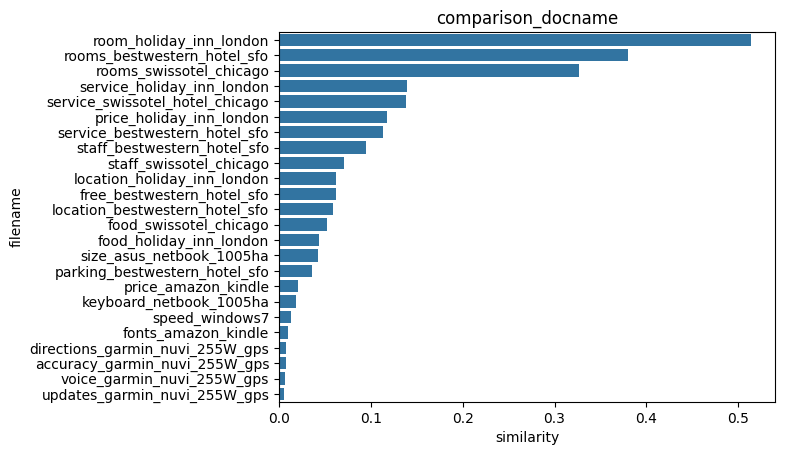

In [ ]:
# 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 기준 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되
# 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1] # 유사도 내림차순 정렬
sorted_index = sorted_index[:,1:] # 자기자신 (=1) 제외

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도 값 내림차순 정렬 후 자기 자신 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 막대그래프로 시각화
# 파일명과 유사도 값 표시
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title('comparison_docname')

# **한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 13.9 MB/s eta 0:00:00


## **KoNLPy 소개**

KoNLPy : 파이썬의 대표적인 한글 형태소 패키지
- 형태소 : 단어로서 의미를 가지는 최소 단위
- 형태소 분석 (Morphological Analysis) : 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업

KoNLPy 에서 사용할 수 있는 형태소 분석 모듈
- Kkma (꼬꼬마)
- Hannanum (한나눔)
- Komoran
- Mecab (윈도우 환경에서 구동 X)
- Twitter

## **데이터 로딩 후 감성 분석 수행**

In [4]:
import pandas as pd

train_df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/ESAA/25-1 OB/Naver Reviews/ratings_train.txt')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [5]:
# 1이 긍정, 0이 부정
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [6]:
import re

# 리뷰 텍스트 중 Null 값을 가진 값은 공백으로 변환
train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규표현식 \d : 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r'\d+',' ',x))

# 테스트 데이터 세트 로딩 후 Null 및 숫자를 공백으로 변환
test_df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/ESAA/25-1 OB/Naver Reviews/ratings_test.txt')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+',' ',x))

# id drop
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

## **TF-IDF 방식으로 벡터화**

각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
- Twitter 클래스를 형태소 엔진으로 사용 : SNS 분석에 적합
- Twitter 객체의 `morphs()` 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화하여 list 객체로 반환

In [7]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
# sklearn의 TfidfVectorizer를 이용해 TF-IDF 피처 모델 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용, ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfdif_matrix_train = tfidf_vect.transform(train_df['document'])

In [11]:
# 로지스틱 회귀를 이용하여 분류 기반의 감성 분석 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV 이용
params = {'C' : [1, 3.5, 4.5, 5.5, 10] }
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfdif_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [13]:
# 테스트 세트를 이용해 최종 감성분석 예측 수행
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier 그대로 사용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
